In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings('ignore')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
import torch
from torchsummary import summary
from torch.autograd import Variable
from torch import nn,optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset,DataLoader

In [3]:
seed=42
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
np.random.seed(seed)
torch.manual_seed(seed)

In [2]:
df=pd.read_csv('saber_combined_all_fields_english.csv')

In [3]:
df=df.loc[df['nationality']=='colombia']

In [4]:
# Ascending order of NaN values in column
for i in df.columns.to_list():
    val=df[i].isnull().sum()/len(df)
    if val>=0.60:
        print(i+':',val)

year_of_exam: 0.7777798809399873
semester_of_exam: 0.7772877409829549
percentage_approval_credits: 0.7869507197546871
did_student_took_preparation_test?: 0.7835909181249467
took_an_special_preparation_test?: 0.704365849272674
took_another_test_thats_not_lectured_by_government?: 0.7041671004438724
did_he_take_an_external_test?: 0.7062444989163457
did_you_did_a_simulacrum?: 0.7040014764198711
are_you_veteran?_air_forces: 0.7040062085348425
generic_preparation_for_test: 0.7040156727647855
fathers_job: 0.6347990270771618
mothers_job: 0.6341507273260711
colombian_sisben_level: 0.7784849660707357
do_you_have_kiln?: 0.7784849660707357
do_you_have_fridge?: 0.777268812523069
do_you_have_cellphone?: 0.777268812523069
does_family_have_a_phone?: 0.7784849660707357
monthly_family_income: 0.7784849660707357
current_job: 0.7802831697598925
expectatives: 0.6212604461437995


In [5]:
icfes_score_df=df.loc[df['undergraduate_core']!='unclassified']

In [6]:
icfes_score_df['undergraduate_core'].isnull().sum()

0

In [14]:
df2=icfes_score_df.copy()
a=0
for i,j in zip(df2['undergraduate_core'].unique().tolist(),df2['undergraduate_core'].value_counts().tolist()):
    print(i,j)
    a+=1
print('******************************************************')
print('Total Unique Undergrdaute Degree Title:',a)    

public accounting 35762
military or police training 15253
economy 14334
administration 14211
industrial engineering 10653
agronomic, livestock engineering 10508
psychology 8231
social communication, journalism 7729
law 7470
geology, other natural science programs 7232
environmental, sanitary engineering 6804
advertising 5373
mechanical engineering 5257
civil engineering 3966
education 3829
sociology, social work 3436
agroindustrial and food engineering 2844
nutrition and dietetics 2752
dentistry 2655
architecture 2571
anthropology, liberal arts 2200
therapies 2060
chemical engineering 1850
other engineering 1801
veterinary medicine 1605
computer systems, telematics engineering 1225
electronic engineering, telecommunications 1156
mining, metallurgy engineering 1119
design 1077
nursing 982
administrative engineering 978
electrical engineering 971
agricultural, forest engineering 898
political science, international relations 825
geography, history 816
bacteriology 814
medicine 786
chemis

In [18]:
replace_field={}
for i in df2.undergraduate_core.unique().tolist():
    m=input(f'Enter the common term for {i} ')
    replace_field[i]=str(m)

Enter the common term for public accounting business
Enter the common term for military or police training defence
Enter the common term for economy business
Enter the common term for administration business
Enter the common term for industrial engineering engineering
Enter the common term for agronomic, livestock engineering engineering
Enter the common term for psychology liberal arts
Enter the common term for social communication, journalism liberal arts
Enter the common term for law liberal arts
Enter the common term for geology, other natural science programs liberal arts
Enter the common term for environmental, sanitary engineering engineering
Enter the common term for advertising business
Enter the common term for mechanical engineering engineering
Enter the common term for civil engineering engineering
Enter the common term for education teaching
Enter the common term for sociology, social work liiberal arts
Enter the common term for agroindustrial and food engineering engineer

In [19]:
replace_field

{'public accounting': 'business',
 'military or police training': 'defence',
 'economy': 'business',
 'administration': 'business',
 'industrial engineering': 'engineering',
 'agronomic, livestock engineering': 'engineering',
 'psychology': 'liberal arts',
 'social communication, journalism': 'liberal arts',
 'law': 'liberal arts',
 'geology, other natural science programs': 'liberal arts',
 'environmental, sanitary engineering': 'engineering',
 'advertising': 'business',
 'mechanical engineering': 'engineering',
 'civil engineering': 'engineering',
 'education': 'teaching',
 'sociology, social work': 'liiberal arts',
 'agroindustrial and food engineering': 'engineering',
 'nutrition and dietetics': 'health science',
 'dentistry': 'medical',
 'architecture': 'engineering',
 'anthropology, liberal arts': 'liberal arts',
 'therapies': 'medical',
 'chemical engineering': 'engineering',
 'other engineering': 'engineering',
 'veterinary medicine': 'medical',
 'computer systems, telematics e

In [20]:
icfes_score_df['undergraduate_core_field']=icfes_score_df['undergraduate_core'].replace(replace_field)

In [102]:
from collections import Counter

In [40]:
Counter(icfes_score_df['undergraduate_core_field'])

Counter({'business': 58701,
         'defence': 2368,
         'engineering': 54210,
         'liberal arts': 42450,
         'teaching': 21243,
         'health science': 3107,
         'medical': 13559,
         'arts and design': 7595})

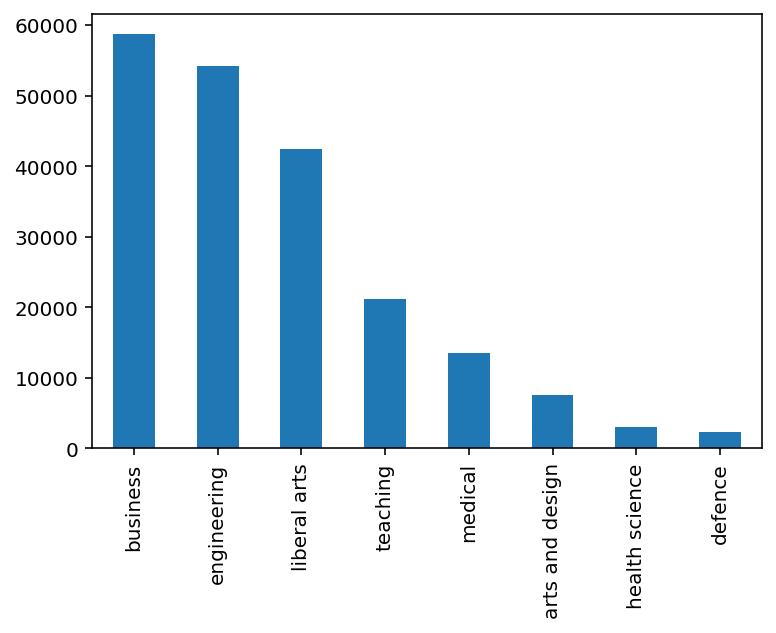

In [35]:
icfes_score_df['undergraduate_core_field'].value_counts().plot(kind='bar');

In [41]:
icfes_score_df=icfes_score_df[['saber_11_icfes_mathematics','saber_11_icfes_language',
              'saber_11_icfes_chemistry',
              'saber_11_icfes_physics',
              'saber_11_icfes_social_sciences',
              'saber_11_icfes_philosophy',
              'saber_11_icfes_english','saber_11_icfes_optative_score','undergraduate_core','undergraduate_core_field']]

In [42]:
#icfes_score_df.to_csv('final_scores.csv',index=False)

In [4]:
#icfes_score_df=pd.read_csv('final_scores.csv')

In [14]:
icfes_score_df.head(5)

,saber_11_icfes_mathematics,saber_11_icfes_language,saber_11_icfes_chemistry,saber_11_icfes_physics,saber_11_icfes_social_sciences,saber_11_icfes_philosophy,saber_11_icfes_english,saber_11_icfes_optative_score,undergraduate_core,undergraduate_core_field
0,43,32,42,33,33,29,38,49,public accounting,business
1,64,48,52,54,44,47,51,6,military or police training,defence
2,42,57,51,28,46,45,43,5,public accounting,business
3,46,40,35,45,42,40,43,29,economy,business
4,44,48,65,44,49,43,42,55,administration,business


In [5]:
from sklearn.preprocessing import RobustScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

rb=RobustScaler()
encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)

In [6]:
X=icfes_score_df.drop(columns=['undergraduate_core','undergraduate_core_field'])
y=icfes_score_df.undergraduate_core_field

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=seed,stratify=y_test)

In [7]:
print(f'Length of dataset of train,validation, and test is {len(X_train)},{len(X_val)},and {len(X_test)} respectively')

Length of dataset of train,validation, and test is 142263,30485,and 30485 respectively


In [10]:
Counter(y_train)

Counter({'business': 41091,
         'engineering': 37947,
         'liberal arts': 29715,
         'arts and design': 5316,
         'teaching': 14870,
         'defence': 1658,
         'medical': 9491,
         'health science': 2175})

In [12]:
Counter(y_val)

Counter({'engineering': 8132,
         'teaching': 3187,
         'business': 8805,
         'liberal arts': 6367,
         'medical': 2034,
         'arts and design': 1139,
         'health science': 466,
         'defence': 355})

In [11]:
Counter(y_test)

Counter({'engineering': 8131,
         'business': 8805,
         'medical': 2034,
         'defence': 355,
         'liberal arts': 6368,
         'teaching': 3186,
         'arts and design': 1140,
         'health science': 466})

In [7]:
# Standarize the column values 
X_train_rs=rb.fit_transform(X_train.values)
X_train_rs=pd.DataFrame(X_train_rs,columns=X_train.columns.tolist())
X_val_rs=rb.transform(X_val.values)
X_val_rs=pd.DataFrame(X_val_rs,columns=X_train.columns.tolist())
X_test_rs=rb.transform(X_test.values)
X_test_rs=pd.DataFrame(X_test_rs,columns=X_train.columns.tolist())

In [8]:
encoder_train=pd.DataFrame(encoder.fit_transform(y_train.values.reshape(-1, 1)))
encoder_val=pd.DataFrame(encoder.transform(y_val.values.reshape(-1, 1)))
encoder_test=pd.DataFrame(encoder.transform(y_test.values.reshape(-1, 1)))

In [9]:
encoder.get_feature_names()

array(['x0_arts and design', 'x0_business', 'x0_defence',
       'x0_engineering', 'x0_health science', 'x0_liberal arts',
       'x0_medical', 'x0_teaching'], dtype=object)

In [73]:
y_train.head(10)

26812        liberal arts
195343       liberal arts
139362        engineering
201936       liberal arts
160053           business
90232         engineering
193458       liberal arts
188860           business
138614       liberal arts
55019     arts and design
Name: undergraduate_core_field, dtype: object

In [39]:
encoder_train.head(10)

,0,1,2,3,4,5,6,7
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X_train_rs.shape[0]/X.shape[0]

0.6999995079539248

In [10]:
train_ds=TensorDataset(torch.FloatTensor(X_train.values),torch.LongTensor(encoder_train.values))
val_ds=TensorDataset(torch.FloatTensor(X_val.values),torch.LongTensor(encoder_val.values))
test_ds=TensorDataset(torch.FloatTensor(X_test.values),torch.LongTensor(encoder_test.values))

In [11]:
train_dl=DataLoader(train_ds,batch_size=32,shuffle=True)
val_dl=DataLoader(val_ds,batch_size=1,shuffle=False)
test_dl=DataLoader(test_ds,batch_size=1,shuffle=False)

In [31]:
for x,y in train_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([32, 8])
torch.Size([32, 8])


In [12]:
class DenseModel(nn.Module):
    def __init__(self,num_labels):
        super(DenseModel,self).__init__()
        self.m=nn.Sequential(nn.Linear(num_labels,16),
                             nn.ReLU(),
                             nn.BatchNorm1d(16),
                             nn.Dropout(0.3),
                             nn.Linear(16,32),
                             nn.ReLU(),
                             nn.BatchNorm1d(32),
                             nn.Dropout(0.3),
                             nn.Linear(32,64),
                             nn.ReLU(),
                             nn.BatchNorm1d(64),
                             nn.Dropout(0.3),
                             nn.Linear(64,32),
                             nn.ReLU(),
                             nn.BatchNorm1d(32),
                             nn.Dropout(0.3),
                             nn.Linear(32,16),
                             nn.ReLU(),
                             nn.BatchNorm1d(16),
                             nn.Dropout(0.3),
                             nn.Linear(16,8),
                             nn.LogSoftmax(dim=1)
                            )
    def forward(self,x):
        out=self.m(x)
        return out

In [13]:
model=DenseModel(8)
model

DenseModel(
  (m): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=16, out_features=32, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=32, out_features=64, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=64, out_features=32, bias=True)
    (13): ReLU()
    (14): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Dropout(p=0.3, inplace=False)
    (16): Linear(in_features=32, out_features=16, bias=True)
    (17): ReLU()
    (18): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_

In [82]:
summary(model,input_size=(32,8),device=device.type)

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Linear: 2-1                       144
|    └─ReLU: 2-2                         --
|    └─BatchNorm1d: 2-3                  32
|    └─Dropout: 2-4                      --
|    └─Linear: 2-5                       544
|    └─ReLU: 2-6                         --
|    └─BatchNorm1d: 2-7                  64
|    └─Dropout: 2-8                      --
|    └─Linear: 2-9                       2,112
|    └─ReLU: 2-10                        --
|    └─BatchNorm1d: 2-11                 128
|    └─Dropout: 2-12                     --
|    └─Linear: 2-13                      2,080
|    └─ReLU: 2-14                        --
|    └─BatchNorm1d: 2-15                 64
|    └─Dropout: 2-16                     --
|    └─Linear: 2-17                      528
|    └─ReLU: 2-18                        --
|    └─BatchNorm1d: 2-19                 32
|    └─Dropout: 2-20                     --
|    └─Linear: 2-

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Linear: 2-1                       144
|    └─ReLU: 2-2                         --
|    └─BatchNorm1d: 2-3                  32
|    └─Dropout: 2-4                      --
|    └─Linear: 2-5                       544
|    └─ReLU: 2-6                         --
|    └─BatchNorm1d: 2-7                  64
|    └─Dropout: 2-8                      --
|    └─Linear: 2-9                       2,112
|    └─ReLU: 2-10                        --
|    └─BatchNorm1d: 2-11                 128
|    └─Dropout: 2-12                     --
|    └─Linear: 2-13                      2,080
|    └─ReLU: 2-14                        --
|    └─BatchNorm1d: 2-15                 64
|    └─Dropout: 2-16                     --
|    └─Linear: 2-17                      528
|    └─ReLU: 2-18                        --
|    └─BatchNorm1d: 2-19                 32
|    └─Dropout: 2-20                     --
|    └─Linear: 2-

In [16]:
model=model.to(device)
loss_fn=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)
scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode='min',factor=0.2,patience=5,verbose=True)

In [17]:
def validation_loss(model,dl):
    model.eval()
    val_loss=0.0
    with torch.no_grad():
        for x,y in dl:
            x=Variable(x).to(device)
            y=Variable(y).to(device)
            out=model(x)
            loss=loss_fn(out,y.argmax(dim=1))
            val_loss+=loss.cpu().item()
    return val_loss/len(dl)        

In [14]:
num_epochs=50
train_losses=[]
val_losses=[]
best_loss=float('inf')
for epoch in range(1,num_epochs+1):
    print(f'{epoch} Epoch is running')
    losses=0.0
    val_loss=[]
    for i,(x,y) in enumerate(train_dl):
        x=Variable(x).to(device)
        y=Variable(y).to(device)
        model.train()
        optimizer.zero_grad()
        out=model(x)
        loss=loss_fn(out,y.argmax(dim=1))
        losses+=loss.item()*x.size(0)
        loss.backward()
        optimizer.step()
        
        # Validation
        if i%500==0:
            val_loss.append(validation_loss(model,val_dl))
    val=sum(val_loss)/len(val_loss)
    if val<best_loss:
        best_loss=val
        torch.save(model.state_dict(),f'model{epoch}.pth')
    scheduler.step(val)
    # Average Training Losses and Validation Losses
    train_losses.append(losses/len(train_dl.dataset))
    val_losses.append(val)    

In [16]:
print(train_losses)

[1.698803360672531, 1.6523136464136166, 1.648517795700684, 1.6463767049682345, 1.6456351357714403, 1.644983525859833, 1.643717055085678, 1.6439187968796953, 1.643604348437757, 1.6430276557077803, 1.6430551670663214, 1.6424644636051864, 1.6425369157975018, 1.6419295450613471, 1.6430488292980698, 1.6432084611494158, 1.6415721653817716, 1.641409296481576, 1.64207617843694, 1.6406096869310465, 1.6416097839028976, 1.6405554688638901, 1.6410963602110218, 1.640386748872649, 1.6406457317333565, 1.6409708359345676, 1.6404340550115235, 1.640624480068746, 1.64046049560731, 1.6406727137546542, 1.6402484022055916, 1.6410221309847153, 1.6404178819142006, 1.6409837862893626, 1.6402484175551608, 1.6405111170268898, 1.6399315841690867, 1.6405146550322072, 1.6403843650320933, 1.6402321870641243, 1.6399825206897314, 1.6405391329453287, 1.6400705816753083, 1.6402545213535102, 1.6404464992587267, 1.6410601121823591, 1.640557046242872, 1.6409551160944882, 1.641269642301544, 1.6407077535305543]


In [26]:
print(val_losses)

[1.7006998395492101, 1.6371449512886753, 1.6427690496057115, 1.637867850119597, 1.6366929759270814, 1.6350808492207167, 1.6330493691551884, 1.63235991638417, 1.6323644095876828, 1.631354733050805, 1.6318656634349584, 1.6319034467406655, 1.6316580819097974, 1.6313861252564872, 1.6354025779415378, 1.6400295913455551, 1.6364075592563914, 1.6394292104166874, 1.6412803368446156, 1.638127382859283, 1.6391160907590667, 1.6432587119664532, 1.6401770343833555, 1.6462794743069946, 1.6416177710165558, 1.6444275077875659, 1.6429823798737835, 1.643717016326053, 1.6458514922470024, 1.6419582815052043, 1.6457648815634516, 1.6472181247135511, 1.6452793353445598, 1.641237656383797, 1.6431977143139773, 1.6471392033675472, 1.6441077486395967, 1.6456639543912444, 1.645260896382192, 1.6459136785868957, 1.6442015941458523, 1.6449956387212987, 1.6407206419857647, 1.6448177382726652, 1.6428088464480106, 1.6430274875549378, 1.6454968341214753, 1.6481087197994233, 1.6434120887078938, 1.6439143088926125]


In [36]:
print(f'Min losses in all the epochs in training is {min(train_losses)} and in validation is {min(val_losses)}')
print(f'Minimal loss at epoch for training is {train_losses.index(min(train_losses))} and for validation is {val_losses.index(min(val_losses))}')

Min losses in all the epochs in training is 1.6399315841690867 and in validation is 1.631354733050805
Minimal loss at epoch for training is 36 and for validation is 9


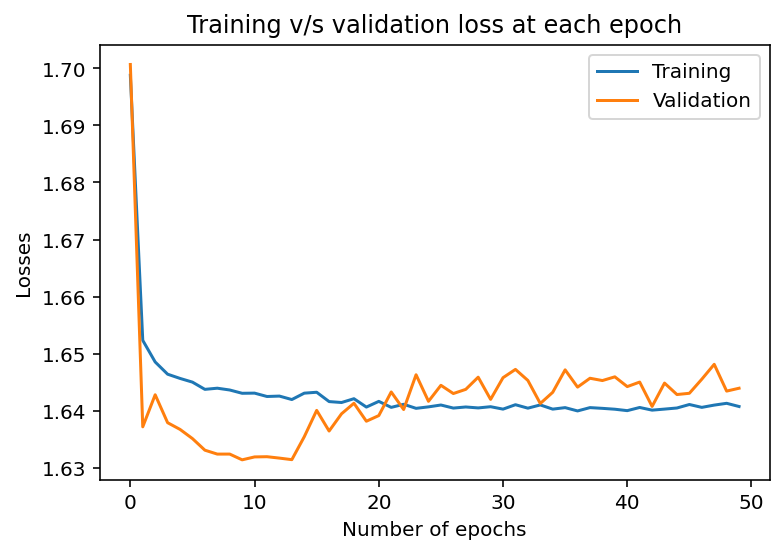

In [41]:
plt.title("Training v/s validation loss at each epoch")
plt.plot(train_losses,label='Training')
plt.plot(val_losses,label='Validation')
plt.xlabel('Number of epochs')
plt.ylabel('Losses')
plt.legend()

Above graph shows that at epoch 10, the validation loss is minimal and the training loss is not changed so much.
At epoch 10, the model parameter has been saved and can be used for testing datasets.

In [61]:
model=DenseModel(8)
model.load_state_dict(torch.load('model10.pth'))
model=model.to(device)
model.eval()

DenseModel(
  (m): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=16, out_features=32, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=32, out_features=64, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=64, out_features=32, bias=True)
    (13): ReLU()
    (14): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Dropout(p=0.3, inplace=False)
    (16): Linear(in_features=32, out_features=16, bias=True)
    (17): ReLU()
    (18): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_

In [78]:
y_pred_list=[]
y_target_list=[]
with torch.no_grad():
    model.eval()
    for xb,yb in test_ds:
        xb=Variable(xb.unsqueeze(0)).to(device)
        pred=model(xb)
        pred=pred.argmax().item()
        y_pred_list.append(pred)
        y_target_list.append(yb.argmax().item())       

In [76]:
idx2class={}
for i,j in enumerate(encoder.get_feature_names()):
    idx2class[i]=j.replace('x0_','')

In [77]:
idx2class

{0: 'arts and design',
 1: 'business',
 2: 'defence',
 3: 'engineering',
 4: 'health science',
 5: 'liberal arts',
 6: 'medical',
 7: 'teaching'}

<AxesSubplot:>

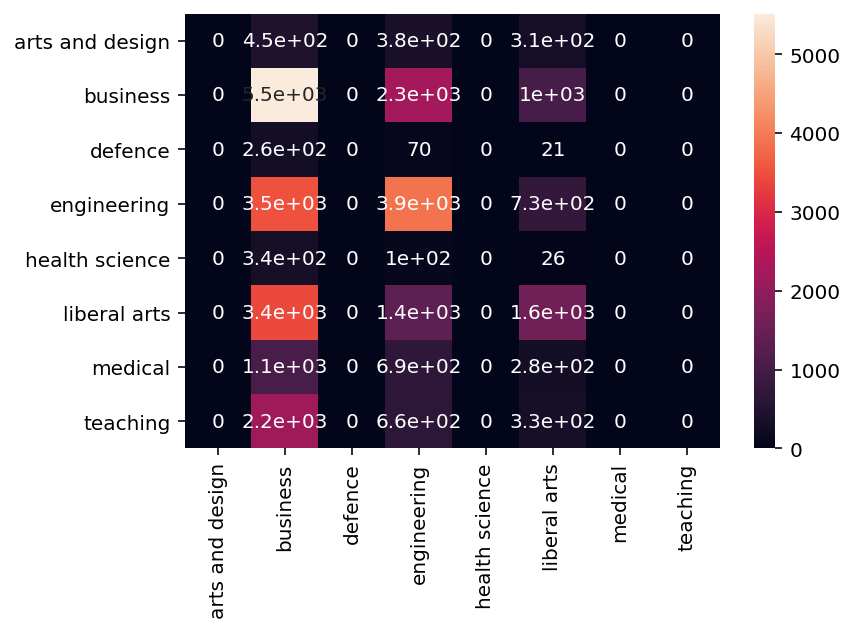

In [82]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_target_list, y_pred_list)).rename(columns=idx2class, index=idx2class)

sns.heatmap(confusion_matrix_df, annot=True)

In [94]:
print(classification_report(y_true=y_target_list,y_pred=y_pred_list,target_names=idx2class.values()))

                 precision    recall  f1-score   support

arts and design       0.00      0.00      0.00      1140
       business       0.33      0.63      0.43      8805
        defence       0.00      0.00      0.00       355
    engineering       0.41      0.48      0.44      8131
 health science       0.00      0.00      0.00       466
   liberal arts       0.37      0.25      0.30      6368
        medical       0.00      0.00      0.00      2034
       teaching       0.00      0.00      0.00      3186

       accuracy                           0.36     30485
      macro avg       0.14      0.17      0.15     30485
   weighted avg       0.28      0.36      0.30     30485



Accuracy around 50% only those whose has more number of samples of Target types

In [103]:
Counter(y_test)

Counter({'engineering': 8131,
         'business': 8805,
         'medical': 2034,
         'defence': 355,
         'liberal arts': 6368,
         'teaching': 3186,
         'arts and design': 1140,
         'health science': 466})

In [100]:
# Whole Accuracy
np.sum(np.array(y_target_list)==np.array(y_pred_list))/len(y_target_list)

0.3604067574216828